In [1]:
import numpy             as np
import matplotlib.pyplot as plt

In [2]:
def pseudo_inv (X: np.array, Y: np.array)->np.array:
    """
      Compute the pseudoinverse matrix for regression/classification
        -> pinv = (X^T X)^-1 X^T y
        
      @param X: -> shape = (n_samples,k_features)
      @param Y: -> shape = (n_samples,1)
      
      @return pinv: -> shape = (k_features,1)
    """
    pinv = np.dot( X.T,X )
    pinv = np.linalg.inv(pinv)
    pinv = np.dot( pinv,X.T )
    pinv = np.dot( pinv,Y   )
    
    return pinv

In [3]:
def extend_x(X: np.array)->np.array:
    """
      Appends a colum of ones to the X matrix
        -> X_ex = [X Ones]
      
      @param X: -> shape = (n_samples,k_features)
      
      @return X_ex: -> shape = (n_samples,k_features+1)
    """
    ones = np.ones( X.shape[0] )[:,np.newaxis]
    
    return np.concatenate( (X,ones), axis=-1 )

In [4]:
def synthetic_line_data( L: list, N: list, n: float )->np.array:
    """
      Generates a list of samples (x_i,y_i) that describes the
      straight line described by:
        -> y_i = L[0]*x_i + L[1]  + n_i.
      
      where n_i is a normal distributed random noise with 0 mean and n variance.
      
      N[2] samples are randomly generated considering a normal 
      distribution with N[0] mean and N[1] variance.
      
              
      @param L: -> [slope, bias]
      @param N: -> [mean, variance, number of samples]
      @param n: -> noise variance, float>0
      
      @return data: list of samples (x_i,y_i) -> shape = (N[2]_samples, 2)
      @return raw : data with no noise        -> shape = (N[2]_samples, 1)
    """
    x    = np.random.normal( N[0],N[1],N[2] )
    n    = np.random.normal(   0 , n  ,N[2] )
    raw  = L[0]*x + L[1]
    y    = raw + n
    data = np.concatenate( ( x[:,np.newaxis],
                             y[:,np.newaxis] ), 
                               axis=-1  )
    raw  = raw[:,np.newaxis]
    return data, raw

In [5]:
def plot_sort( data : np.array    , 
               raw  : np.array    , 
               ltype: str         , 
               alpha: float=1.    ,
               color: str='orange'  ) -> None:
    """
      
    """
    idx   = np.argsort( data )
    trash = plt.plot  ( data[idx], raw[idx] , 
                           ltype            , 
                           color    =color  ,
                           linewidth=4      ,
                           alpha    =alpha    )

In [6]:
def plot_setup( name: str, size: tuple ) -> None:
    """
      
    """
    trash = plt.figure( name, figsize=size )
    trash = plt.grid(True)

In [7]:
def plot_varrows( x,y1,y2,alpha=1,color='black' ):
    for i,j,k in zip( x,y1,y2 ):
        plt.arrow( i,j, 0,k-j,alpha=alpha,color=color )

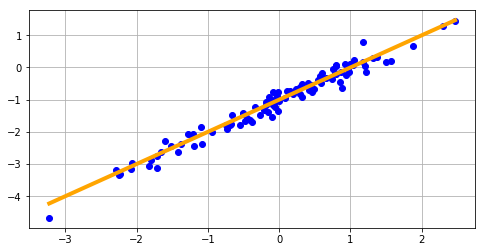

In [8]:
data,raw = synthetic_line_data( [1,-1], [0,1,100], .2 )

plot_setup( '1',(8,4) )
trash = plt.plot ( data[:,0], data[:,1], 'o', color='blue' )
trash = plot_sort( data[:,0], raw, '-')
plt.show()

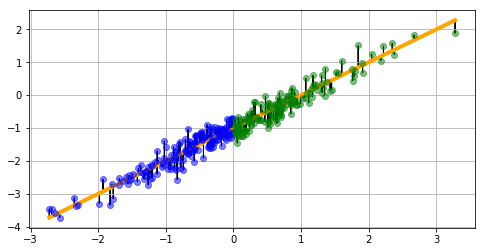

In [9]:
data,raw = synthetic_line_data( [1,-1], [0,1,300], .25 )

M = ( data[:,0]<0 )
d = 1
L = -2*d*M + d
L = L[:,np.newaxis]

plot_setup( '1',(8,4) )
trash = plot_sort( data[ :,0], raw, '-')
trash = plt.plot ( data[ M,0], data[ M,1], 'o', color='blue' , alpha=.5 )
trash = plt.plot ( data[~M,0], data[~M,1], 'o', color='green', alpha=.5 )

plot_varrows( data[:,0],data[:,1],raw[:,0] )
plt.show()

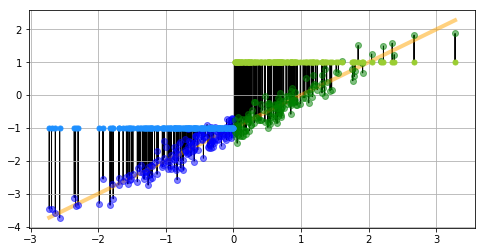

In [10]:
plot_setup( '1',(8,4) )
trash = plot_sort( data[: ,0], raw, '-',alpha=.5)
trash = plt.plot ( data[ M,0], data[ M,1], 'o', color='blue' , alpha=.5 )
trash = plt.plot ( data[~M,0], data[~M,1], 'o', color='green', alpha=.5 )
trash = plt.plot ( data[ M,0],L[ M], 'o', color='dodgerblue' , markersize=5 )
trash = plt.plot ( data[~M,0],L[~M], 'o', color='yellowgreen', markersize=5 )

plot_varrows( data[:,0],data[:,1],L[:,0] )
plt.show()

In [11]:
X_Train = data[ :,0:1 ]
X_Train = extend_x(X_Train)
Y_Train = L

W = pseudo_inv( X_Train,Y_Train )
print(W)

[[0.79466995]
 [0.00329807]]


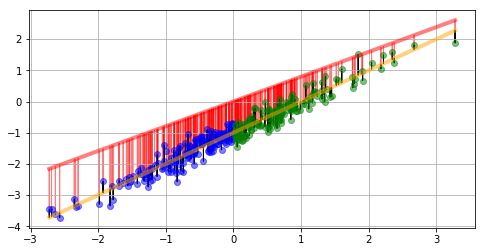

In [12]:
E = np.dot( X_Train,W )

plot_setup( '1',(8,4) )
trash = plt.plot ( data[ M,0], data[ M,1], 'o', color='blue' , alpha=.5 )
trash = plt.plot ( data[~M,0], data[~M,1], 'o', color='green', alpha=.5 )

trash = plot_sort( data[:,0],raw[:,0], '-',alpha=.5)
trash = plot_sort( data[:,0],  E[:,0], '-',alpha=.5,color='red')

plot_varrows( data[:,0],data[:,1],E[:,0],alpha=.5, color='red' )
plot_varrows( data[:,0],data[:,1],raw[:,0]  )

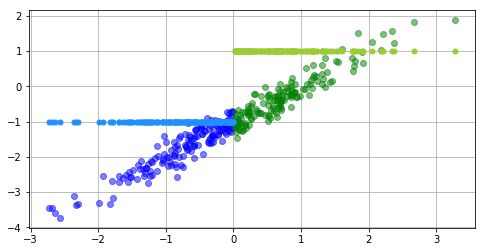

In [13]:

plot_setup( '1',(8,4) )
trash = plt.plot ( data[ M,0], data[ M,1], 'o', color='blue' , alpha=.5 )
trash = plt.plot ( data[~M,0], data[~M,1], 'o', color='green', alpha=.5 )
trash = plt.plot ( data[ M,0],L[ M], 'o', color='dodgerblue' , markersize=5 )
trash = plt.plot ( data[~M,0],L[~M], 'o', color='yellowgreen', markersize=5 )

In [14]:
X_Train = t [::10][:,np.newaxis]
Y_Train = ft[::10][:,np.newaxis]

print(X_Train.shape)
X_Train = extend_x(X_Train)
print(X_Train.shape)
#w = pseudo_inv(  np.concatenate( (X_Train,Ones),axis=-1 ),Y_Train  )
w = pseudo_inv(  X_Train,Y_Train  )
w.shape

NameError: name 't' is not defined

In [3]:
t  = np.linspace(0,2*np.pi,100)
ft = np.sin(t)

In [4]:
def plot_di(X,Y,L):
    plt.figure( figsize=(10,5) )
    plt.plot(X,Y,'o',markersize=20)
    plt.plot(X,L,color='orange',linewidth=3)
    
    for i,j,k in zip(X,Y,L):
        plt.arrow(i,k,0,j-k,color='black')

    plt.grid(True)

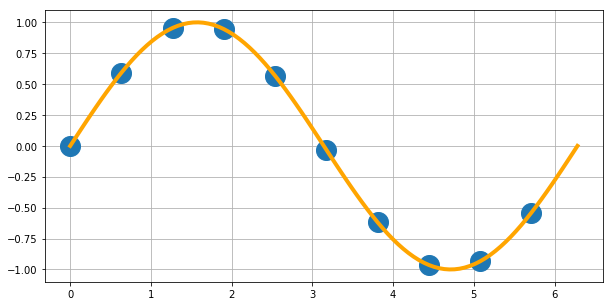

In [5]:
plt.figure( figsize=(10,5) )
plt.plot(t[::10],ft[::10],'o',markersize=20)
plt.plot(t      ,ft      ,color='orange',linewidth=4)

plt.grid(True)

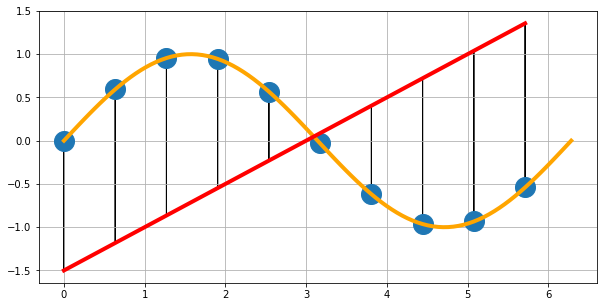

In [6]:
plt.figure( figsize=(10,5) )
plt.plot(t[::10],ft[::10],'o',markersize=20)
plt.plot(t      ,ft             ,color='orange',linewidth=4)
plt.plot(t[::10],0.5*t[::10]-1.5,color='red'   ,linewidth=4)

for i,j,k in zip(t[::10],ft[::10],0.5*t[::10]-1.5):
    plt.arrow(i,k,0,j-k,color='black')

plt.grid(True)

In [7]:
X_Train = t [::10][:,np.newaxis]
Y_Train = ft[::10][:,np.newaxis]
Ones    = np.ones( X_Train.shape[0] )[:,np.newaxis]

w = pseudo_inv(  np.concatenate( (X_Train,Ones),axis=-1 ),Y_Train  )

In [8]:
X_Test = t [1::7][:,np.newaxis]
Y_Test = ft[1::7][:,np.newaxis]
Ones   = np.ones( X_Test.shape[0] )[:,np.newaxis]

Y_Lab  = np.dot(  np.concatenate( (X_Test,Ones),axis=-1 ),w  )

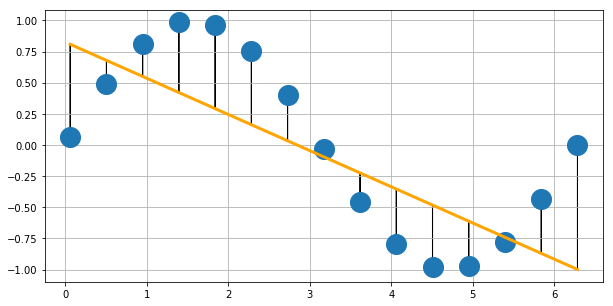

In [9]:
plot_di( X_Test[:,0],Y_Test[:,0],Y_Lab[:,0] )

(15, 1)


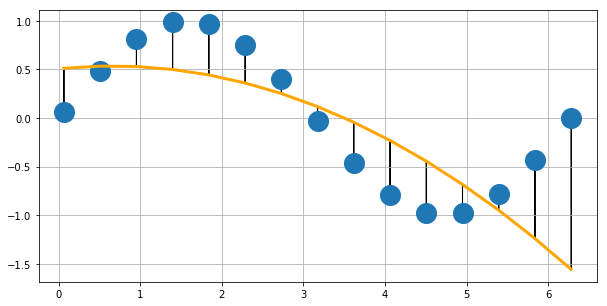

In [11]:
X_Train = t [::10][:,np.newaxis]
Y_Train = ft[::10][:,np.newaxis]
Ones    = np.ones( X_Train.shape[0] )[:,np.newaxis]

w2 = pseudo_inv(  np.concatenate( (X_Train**2, X_Train,Ones),axis=-1 ),Y_Train  )

X_Test = t [1::7][:,np.newaxis]
Y_Test = ft[1::7][:,np.newaxis]
Ones   = np.ones( X_Test.shape[0] )[:,np.newaxis]

Y_Lab  = np.dot(  np.concatenate( (X_Test**2,X_Test,Ones),axis=-1 ),w2  )

plot_di( X_Test[:,0],Y_Test[:,0],Y_Lab[:,0] )
print(X_Test.shape)

In [ ]:
X_Train = t [::10][:,np.newaxis]
Y_Train = ft[::10][:,np.newaxis]
Ones    = np.ones( X_Train.shape[0] )[:,np.newaxis]

w3 = pseudo_inv(  np.concatenate( (X_Train**4,X_Train**3,X_Train**2, X_Train,Ones),axis=-1 ),Y_Train  )

X_Test = t [1::7][:,np.newaxis]
Y_Test = ft[1::7][:,np.newaxis]
Ones   = np.ones( X_Test.shape[0] )[:,np.newaxis]

Y_Lab  = np.dot(  np.concatenate( (X_Test**4,X_Test**3,X_Test**2,X_Test,Ones),axis=-1 ),w3  )

plot_di( X_Test[:,0],Y_Test[:,0],Y_Lab[:,0] )

In [ ]:
print('{}\n\n{}\n\n{}'.format( str(w),str(w2),str(w3) ) )

In [ ]:
X_Train  = t [::10][:,np.newaxis]
Y_Train  = ft[::10]
Y_Train += np.random.normal(0,.3,Y_Train.shape[0])
Y_Train  = Y_Train[:,np.newaxis]
Ones     = np.ones( X_Train.shape[0] )[:,np.newaxis]

w3 = pseudo_inv(  np.concatenate( (X_Train**4,X_Train**3,X_Train**2, X_Train,Ones),axis=-1 ),Y_Train  )

X_Test  = t [1::4][:,np.newaxis]
Y_Test  = ft[1::4]
Y_Test += np.random.normal(0,.1,Y_Test.shape[0])
Y_Test  = Y_Test[:,np.newaxis]
Ones    = np.ones( X_Test.shape[0] )[:,np.newaxis]

Y_Lab  = np.dot(  np.concatenate( (X_Test**4,X_Test**3,X_Test**2,X_Test,Ones),axis=-1 ),w3  )

plot_di( X_Test[:,0],Y_Test[:,0],Y_Lab[:,0] )

In [ ]:
print('{}'.format( str(w3) ) )